In [1]:
%cd /content/drive/MyDrive/LAB__XIA/LAB_XIA

/content/drive/MyDrive/LAB__XIA/LAB_XIA


# **BLACK BOX MODEL CREATE**

In [ ]:
!pip install kaggle
!wget -O kaggle.json https://www.dropbox.com/scl/fi/7cmh7oq8tl92eoqmbdltz/kaggle.json?rlkey=4e5tq5o593oydzwjy7vy4ssyv&dl=0
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d diegobabativa/depression
!unzip /content/depression.zip
!rm /content/depression.zip

In [ ]:
!kaggle datasets download -d diegobabativa/depression

In [ ]:
!kaggle datasets download -d diegobabativa/depression
!unzip /content/depression.zip
!rm /content/depression.zip

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import pandas as pd
df = pd.read_csv('/content/b_depressed.csv')

df = df.drop(['Survey_id'], axis=1)

df = df.fillna(method='ffill').dropna()

normalized_df = (df - df.min()) / (df.max() - df.min())

# Suponiendo que 'df' es el DataFrame con los datos a procesar
# y 'target' es el nombre de la columna objetivo

# Identificar columnas categóricas y numéricas
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('target')  # Asumimos que 'target' no debe ser normalizado

# Crear transformadores para las columnas numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Tratar valores faltantes
    ('scaler', MinMaxScaler())  # Escalar las características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Tratar valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode las características categóricas
])

# Combinar transformadores en un preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Crear un pipeline que procese los datos y luego aplique un modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])



In [ ]:
import pandas as pd

# Asumiendo que df es tu DataFrame y 'column_name' es la columna donde quieres buscar duplicados
duplicados = df[df['Ville_id'].duplicated()]['Ville_id']

print("Valores duplicados en la columna:", duplicados.unique())


In [ ]:
duplicados = df.loc[df['Survey_id'].duplicated(), 'Survey_id']

print("Valores duplicados en la columna:", duplicados.unique())

In [ ]:
data

In [ ]:
data = data.drop(['Survey_id','Ville_id'], axis=1)

In [ ]:
 Seleccionar columnas relevantes y descartar filas con valores nulos en columnas clave

data
data_clean = data.dropna(subset=['suicides_no', 'population', 'gdp_per_capita ($)'])

# Definir las columnas categóricas y numéricas para el preprocesamiento
categorical_features = ['country', 'year', 'sex', 'age', 'generation']
numerical_features = ['population', 'gdp_per_capita ($)']

# Crear transformadores para las columnas numéricas y categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combinar transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Separar características y objetivo
X = data_clean.drop(['suicides_no', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($) '], axis=1)
y = data_clean['suicides_no']


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import json
import urllib.request
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
!pip install kaggle
!pip install tab-transformer-pytorch

class Bb_Models():

  def __init__(self,tabular_model):

    #TABULAR



    #TEXT

    #IMAGES

  def get_bb_tab_model(self):
    #https://github.com/lucidrains/tab-transformer-pytorch
    #Dataset pre select
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

# Carga el conjunto de datos
data = pd.read_csv(url, names=column_names)

    self.bbmtab =


  def get_bb_img_model(self):

    self.bbmimg = models.resnet50(pretrained=True)
    self.bbmimg.eval()
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.bbmimg.to(self.device)

    self.tf_img = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

    return self.bbmimg

  def get_batch_bb_img_model(self):
    return self.bbmimg



  def bbimg_inference(self,array_img):


    if isinstance(array_img, str):

      img = Image.open(array_img)
      img_t = self.tf_img(img)

      batch_t = torch.unsqueeze(img_t, 0)
      batch_t = batch_t.to(self.device)

      with torch.no_grad():
        outputs = self.bbmimg(batch_t)
        probs = torch.nn.functional.softmax(outputs[0], dim=0)

      url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
      class_idx = json.load(urllib.request.urlopen(url))
      # Invertir el mapeo para obtener un diccionario de índice a etiqueta
      idx2label = {int(key):value for key, value in class_idx.items()}
      top5_prob, top5_catid = torch.topk(probs, 5)

      for i in range(top5_prob.size(0)):
        idx = top5_catid[i].item()
        label = idx2label[idx][1]  # Obtener el nombre de la clase
        print(f"{i+1}: {label}, Probabilidad: {top5_prob[i].item():.6f}")

      return batch_t

    else:

      imgs = []
      for img_arr in array_img:
          # Convertir el array de NumPy a PIL.Image
          img = Image.fromarray(img_arr.astype('uint8'), 'RGB')
          # Aplicar transformaciones
          img_transformed = self.tf_img(img)
          imgs.append(img_transformed)

      #batch = torch.stack(tuple(self.tf_img(i) for i in array_img), dim=0)
      batch = torch.stack(imgs, dim=0)
      batch = batch.to(self.device)
      with torch.no_grad():

        outputs = self.bbmimg(batch)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        return probs.cpu().numpy()


In [ ]:
blackbox_model = Bb_Models()

In [ ]:
blackbox_model.bbimg_inference('/content/leo.jpg')

# **DATASET OF TEST**

In [10]:
%cd /content
!pip install kaggle # Instalar kaggle
!wget -O kaggle.json https://www.dropbox.com/scl/fi/2o48co66yblzdyyxpop4m/kaggle.json?rlkey=4h8fmstfcccbzi6prtpugq6kj&dl=0 # Descargar archivo .json con clave

/content
--2024-03-05 13:28:04--  https://www.dropbox.com/scl/fi/2o48co66yblzdyyxpop4m/kaggle.json?rlkey=4h8fmstfcccbzi6prtpugq6kj
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc346c37d2770e741642d868fd2d.dl.dropboxusercontent.com/cd/0/inline/COiQGzqQLW9Y3DDr-raB8oyXjTRY3Dn3t_goEnVPZD8Ws1gtDaPg9Avy20Z7FUoC5B6dHUKx78Fyk0XszEBtlse87UyspdX99tuk9G-hL-Y4Zak8MJuLjCvHK8CKMggnBjU1cKo2cFBWFhWFm5phWeBx/file# [following]
--2024-03-05 13:28:05--  https://uc346c37d2770e741642d868fd2d.dl.dropboxusercontent.com/cd/0/inline/COiQGzqQLW9Y3DDr-raB8oyXjTRY3Dn3t_goEnVPZD8Ws1gtDaPg9Avy20Z7FUoC5B6dHUKx78Fyk0XszEBtlse87UyspdX99tuk9G-hL-Y4Zak8MJuLjCvHK8CKMggnBjU1cKo2cFBWFhWFm5phWeBx/file
Resolving uc346c37d2770e741642d868fd2d.dl.dropboxusercontent.com (uc346c37d2770e741642d868fd2d.dl.dropboxusercontent.com)... 162.125.83.1

In [11]:
!mkdir -p ~/.kaggle # Crea una carpeta llamada kaggle en raiz
!cp kaggle.json ~/.kaggle/ # Copia el archivo json en la carpeta creada

In [12]:
!chmod 600 ~/.kaggle/kaggle.json # Dar permisos a kaggle

In [13]:
!kaggle datasets download -d joebeachcapital/differentiated-thyroid-cancer-recurrence

differentiated-thyroid-cancer-recurrence.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!unzip /content/differentiated-thyroid-cancer-recurrence.zip

Archive:  /content/differentiated-thyroid-cancer-recurrence.zip
replace Thyroid_Diff.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [30]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [15]:
import pandas as pd

df = pd.read_csv('/content/Thyroid_Diff.csv')

class_names = df['Recurred'].unique()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting the dataset into features and target variable
# Assuming the 'Response' column is the target variable. If not, replace 'Response' with the correct target variable.
X = df.drop('Recurred', axis=1)
y = df['Recurred']


split_idx = int(len(X) * 0.8)

# Dividiendo el DataFrame
X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

# Ajustando los índices para que comiencen en 1
X_train.index = range(0, len(X_train) )
X_test.index = range(0, len(X_test))
y_train.index = range(0, len(y_train))
y_test.index = range(0, len(y_test))


# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Displaying the transformed dataset and split sizes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((306, 16), (77, 16), (306,), (77,))

In [16]:
train_set = X_train
train_label = y_train
test_set = X_test
test_label = y_test
feature_names = test_set.columns

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)
rf.fit(train_set, train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=500,
                       max_features='auto', min_samples_leaf=10,
                       min_samples_split=50, random_state=0)

In [18]:

predictions1 = rf.predict(train_set)
score = rf.score(train_set, train_label)
report = classification_report(train_label, predictions1)
print('Classification report for train set ', report)
predictions1 = rf.predict(test_set)
score = rf.score(test_set, test_label)
report = classification_report(test_label, predictions1)
print('Classification report for test set ', report)

Classification report for train set                precision    recall  f1-score   support

           0       1.00      0.90      0.95       272
           1       0.56      0.97      0.71        34

    accuracy                           0.91       306
   macro avg       0.78      0.94      0.83       306
weighted avg       0.95      0.91      0.92       306

Classification report for test set                precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.99      0.96      0.97        74

    accuracy                           0.95        77
   macro avg       0.69      0.81      0.74        77
weighted avg       0.96      0.95      0.95        77



# **LOREsa**

Basados en https://github.com/francescanaretto/LORE_sa

In [ ]:
%cd /content/drive/MyDrive/LAB__XIA/LAB_XIA/LORE
!pip install -r ./requitements.txt
from lorem_new import LOREM
import pandas as pd
from collections import defaultdict

In [ ]:
neigh_type = 'cfs' # the generation you want (random, genetic, geneticp, cfs, rndgen)
binary = 'binary_from_dts' #how to merge the trees (binary from dts, binary from bb are creating a binary tree, nari is creating a n ari tree)
cxpb = 0.7 # values to set for the genetic generation
mutpb = 0.5 #values to set for the genetic generation
ngen = 2 # number of neighborhood generations to do
runs = 2 #how many neighbours and trees to create and then merge
class_name = 'Recurred' #name of the column used as target
class_values = [0,1] #values that the target may have

feature_names = test_set.columns
real_feature_names = test_set.columns
numeric_columns = list()
for c in test_set.columns:
    numeric_columns.append(test_set.columns.get_loc(c))

features_map = defaultdict(dict)
i = 0
j = 0

while i < len(feature_names) and j < len(real_feature_names):
    if feature_names[i] == real_feature_names[j]:
        features_map[j][feature_names[i].replace('%s=' % real_feature_names[j], '')] = i
        i += 1
        j += 1
    elif feature_names[i].startswith(real_feature_names[j]):
        features_map[j][feature_names[i].replace('%s=' % real_feature_names[j], '')] = i
        i += 1
    else:
        j += 1

In [ ]:
neigh_kwargs = {
        "balance": False,
        "sampling_kind": "gaussian",
        "kind": "gaussian_global",
        "downward_only": True,
        "redo_search": True,
        "forced_balance_ratio": 0.5,
        "cut_radius": True,
        "n": 50,
        "normalize": 'minmax',
        "forced_balance_ratio": 0.5,
        "n_batch": 5,
        "datas": train_set.values
    }

In [ ]:
# neigh type: the way in which you want to generate the neighbourhood (random, genetic, geneticp, rndgen, rndgenp, cfs)
# ocr, mutpb, cxpb: values to set for the genetic generation
# negen: number of neighborhood generations to do
# runs: how many neighbours and trees to create and then merge
# discretize: in the surrogate trees, discretize variables to better generalize and have a smaller tree
# binary: how to merge the trees (binary from dts, binary from bb are creating a binary tree, nari is creating a n ari tree)
# encdec: if you want to generate the neighbours in an encoded space (for now you can select onw hot and target encoding)
# dataset: in case you selected an encdec, this dataset is used to fit the encoder
# K_transformed: a piece of dataset in the form you can feed to the BB
# extreme fidelity: if True, it checks that the prediction of the surrogate model is the same as the BB
# filter c rules: it filters the counterfactual rules by checking if they are true conterfactuals or not
explainer = LOREM(train_set.values, rf.predict, rf.predict_proba, feature_names, class_name, class_values, numeric_columns, features_map,
                      neigh_type=neigh_type, categorical_use_prob=True, continuous_fun_estimation=True, size=1000,
                      ocr=0.1, multi_label=False, one_vs_rest=False, random_state=42, verbose=True,
                      Kc=train_set, bb_predict_proba=rf.predict_proba, K_transformed=train_set, discretize=True,
                      encdec=None, binary=binary, **neigh_kwargs)

In [ ]:
test_set.info()

In [ ]:
# x the instance to explain
# samples the number of samples to generate during the neighbourhood generation
# use weights True or False
# metric default is neuclidean, it is the metric employed to measure the distance between records
# runs number of times the neighbourhood generation is done
# exemplar_num number of examplars to retrieve
# kwargs a dictionary in which add the parameters needed for cfs generation
# kernel and kernel width are for the definition of weights. deafult is None, it automatically select them.

explanation = explainer.explain_instance_stable(test_set.loc[0].values.reshape(1,-1), 150, runs=runs, n_jobs=2)


In [ ]:
print(explanation.rule)
for c in explanation.crules:
    print(c)

In [ ]:
explanation.exemplars

In [ ]:
explanation.feature_importance_all


In [ ]:
explanation.feature_importance


# **DLIME**

Repositorio https://github.com/rehmanzafar/dlime_experiments/tree/master

Article https://www.mdpi.com/2504-4990/3/3/27

In [19]:
%cd /content/drive/MyDrive/LAB__XIA/LAB_XIA/DLIME

/content/drive/MyDrive/LAB__XIA/LAB_XIA/DLIME


In [20]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 942.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Boruta: filename=Boruta-0.1.5-py3-none-any.whl size=53646 sha256=5a3293a532130254938be6e9729b7e60e4dfd9bb20dea0a2e2ab209df248f4bb
  Stored in directory: /root/.cache/pip/wheels/33/d4/12/9d756d12834dc168af296df8db5e487c86b957e5c0249fcd82
Successfully built Boruta


In [21]:
import explainer_tabular

In [22]:
explainer = explainer_tabular.LimeTabularExplainer(train_set.values,   mode="classification", feature_names=feature_names,
                                 class_names=class_names, discretize_continuous=True,  verbose=False)

In [29]:
class_names

array(['No', 'Yes'], dtype=object)

In [23]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
names = list(df.columns)
clustered_data = np.column_stack([X, clustering.labels_])

In [24]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_set.values)
distances, indices = nbrs.kneighbors(test_set.values)
clabel = clustering.labels_

In [25]:
# Computes the similarity of  items
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

#Computes thedissimilarity of items
def jaccard_distance(usecase):
    sim = []
    for l in usecase:
        i_sim = []
        for j in usecase:
            i_sim.append(1 - jaccard_similarity(l, j))
        sim.append(i_sim)
    return sim

In [26]:
from sklearn.linear_model import LinearRegression

In [38]:
train_set.iloc[0, :]

Age                     27
Gender                   0
Smoking                  0
Hx Smoking               0
Hx Radiothreapy          0
Thyroid Function         2
Physical Examination     3
Adenopathy               3
Pathology                2
Focality                 1
Risk                     2
T                        0
N                        0
M                        0
Stage                    0
Response                 2
Name: 0, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

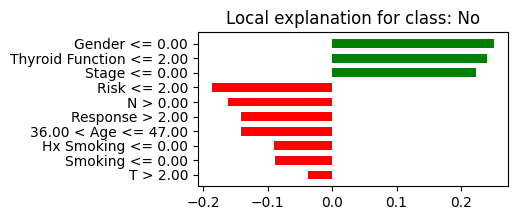

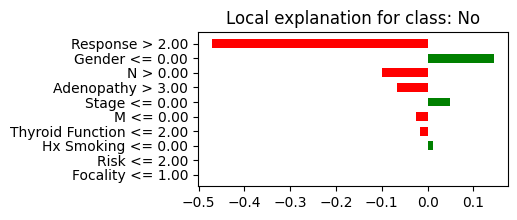

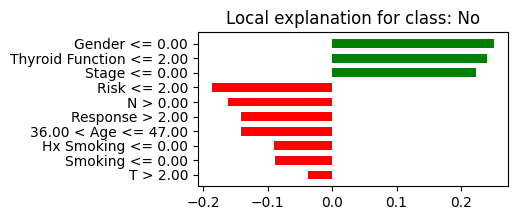

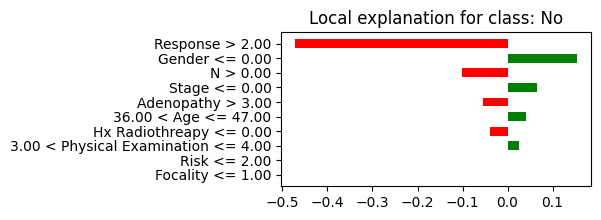

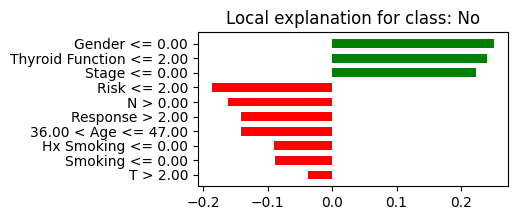

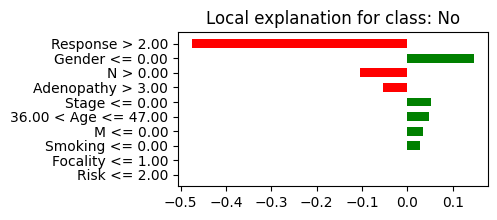

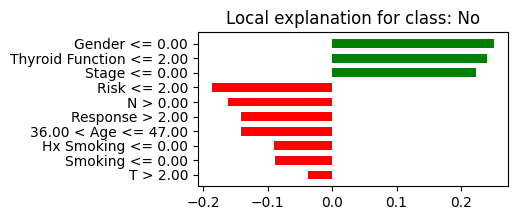

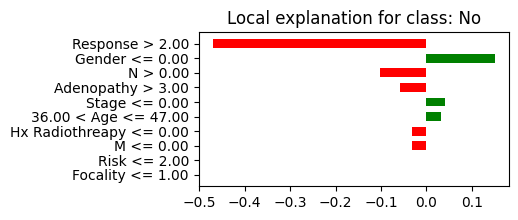

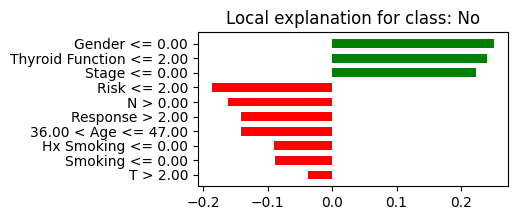

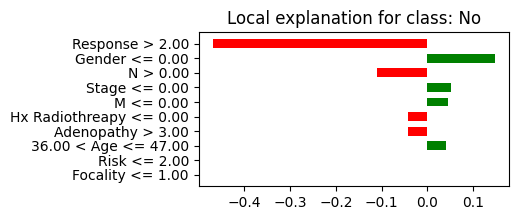

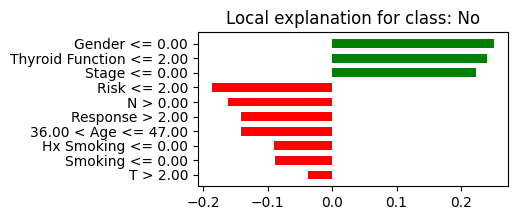

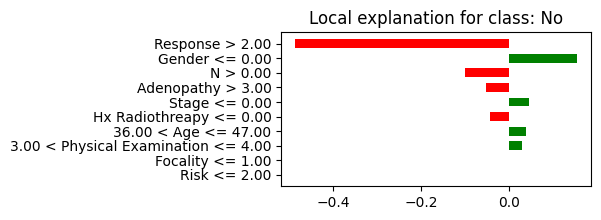

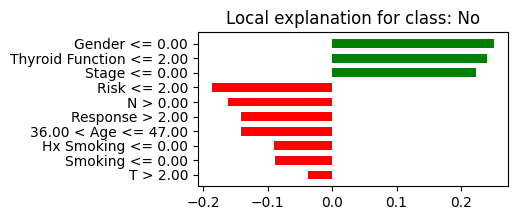

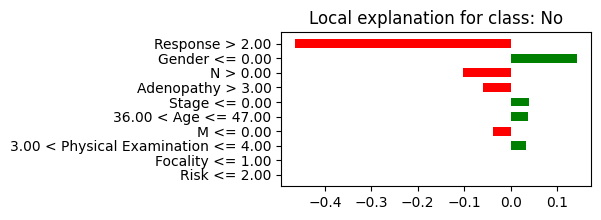

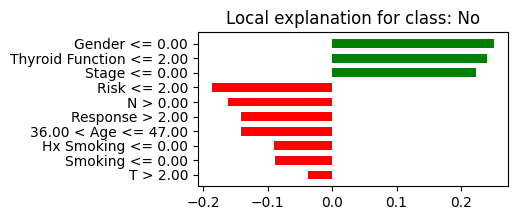

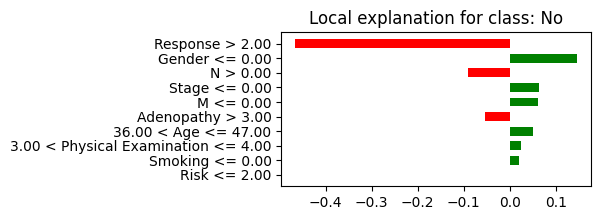

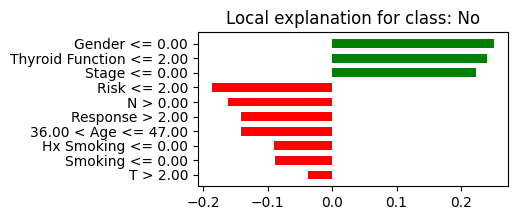

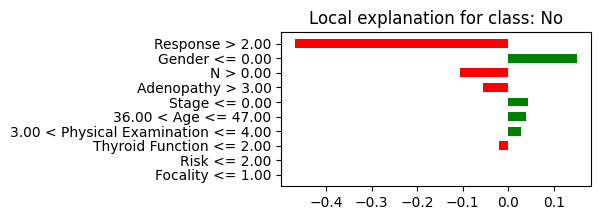

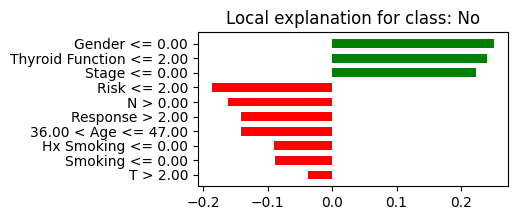

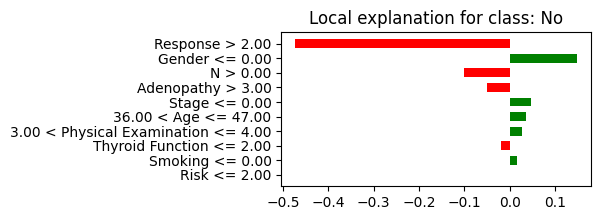

In [39]:
x = 2
test = test_set.values
dlime_exp = []
lime_exp = []

for i in range(0, 10):
        p_label = clabel[indices[x]]
        N = clustered_data[clustered_data[:, 15] == p_label]
        subset = np.delete(N, 15, axis=1)

        exp_dlime = explainer.explain_instance_hclust(test_set.iloc[x, :],
                                             rf.predict_proba,
                                             num_features=10,
                                             model_regressor=LinearRegression(),
                                             clustered_data = subset,
                                             regressor = 'linear', explainer='dlime', labels=(0,1))

        fig_dlime, r_features = exp_dlime.as_pyplot_to_figure(type='h', name = i+.2, label='0')
        #fig_dlime.show()
        dlime_exp.append(r_features)


        exp_lime = explainer.explain_instance_hclust(test_set.iloc[x, :],
                                             rf.predict_proba,
                                             num_features=10,
                                             model_regressor= LinearRegression(),
                                             regressor = 'linear', explainer = 'lime', labels=(0,1))

        fig_lime, r_features = exp_lime.as_pyplot_to_figure(type='h', name = i+.3, label='0')
        #fig_lime.show()
        lime_exp.append(r_features)

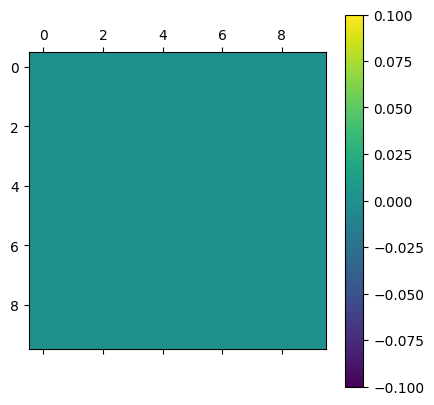

In [41]:
import matplotlib.pyplot as plt

sim = jaccard_distance(dlime_exp)
#np.savetxt("results/nn_dlime_jdist_bc.csv", sim, delimiter=",")
#print(np.asarray(sim).mean())

plt.matshow(sim);
plt.colorbar()
#plt.savefig("results/sim_use_case_2.pdf", bbox_inches='tight')
#plt.show()

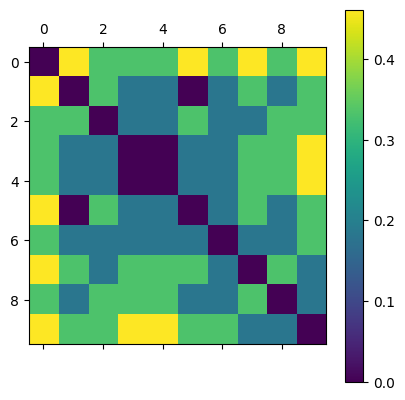

In [42]:
sim = jaccard_distance(lime_exp)
#np.savetxt("results/nn_lime_jdist_bc.csv", sim, delimiter=",")
#print(np.asarray(sim).mean())

plt.matshow(sim);
plt.colorbar()
#plt.savefig("results/sim_use_case_3.pdf", bbox_inches='tight')
#plt.show()

# **LIME**

In [ ]:
!pip install lime

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

explainer = lime_image.LimeImageExplainer()
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

image = Image.open("/content/leo.jpg")
image = image.convert('RGB')  # Asegúrate de que la imagen está en RGB

explanation = explainer.explain_instance(np.array(image),
                                         blackbox_model.bbimg_inference,  # función de clasificación definida anteriormente
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000,  # puedes ajustar este número
                                         segmentation_fn=segmenter)

# Visualizar la explicación para la clase específica
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

# **OTHERS**

In [ ]:
!pip install captum

In [ ]:
!ls

In [ ]:
!git clone https://github.com/Hryniewska/EnsembleXAI.git

In [ ]:
%cd /content/EnsembleXAI

In [ ]:
!ls

In [ ]:
import torch
from EnsembleXAI.Ensemble import normEnsembleXAI
from captum.attr import IntegratedGradients, GradientShap, Saliency

In [ ]:
from captum.attr import

In [ ]:
# Cargar y preparar una imagen
img = Image.open("/content/leo.jpg")
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
net = blackbox_model.get_bb_img_model()
inputs = blackbox_model.bbimg_inference('/content/leo.jpg')

In [ ]:
ig = IntegratedGradients(net).attribute(inputs, target=3)
baselines = torch.randn_like(inputs)
gs = GradientShap(net).attribute(inputs,baselines = baselines, target=3)
sal = Saliency(net).attribute(inputs, target=3)


explanations = torch.stack([ig, gs, sal], dim=0)
agg = normEnsembleXAI(explanations, aggregating_func='avg')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para visualizar una atribución
def visualize_attribution(attribution):
    # Suponiendo que la atribución es [1, C, H, W], la reducimos a [H, W] para visualización
    # Esto es un ejemplo; tu lógica de reducción puede variar
    attribution = attribution.squeeze().mean(dim=0).cpu().detach().numpy()

    plt.imshow(attribution, cmap='viridis')
    plt.colorbar()
    plt.show()

# Visualiza las atribuciones de IntegratedGradients
visualize_attribution(ig)

# Visualiza las atribuciones de GradientShap
visualize_attribution(gs)

# Visualiza las atribuciones de Saliency
visualize_attribution(sal)


In [ ]:

# Procesar las atribuciones para obtener un mapa de calor
# Seleccionamos una técnica simple aquí: tomar el valor absoluto y luego normalizar
attribution_visual = np.mean(np.abs(attribution_np), axis=0)  # Promedio sobre los canales para simplificar
attribution_visual = attribution_visual / np.max(attribution_visual)  # Normalizar

# Crear el mapa de calor superponiendo las atribuciones en la imagen original
plt.figure(figsize=(10, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(input_visual)
plt.axis('off')
plt.title('Original Image')

# Mostrar el mapa de calor de las atribuciones
plt.subplot(1, 2, 2)
plt.imshow(input_visual, alpha=0.5)  # Mostrar la imagen con semi-transparencia
plt.imshow(attribution_visual, cmap='jet', alpha=0.5)  # Superponer el mapa de calor
plt.axis('off')
plt.title('Guided GradCAM')

plt.show()

In [ ]:
visualize_attribution(attribution)

In [ ]:
from torchvision import models
import torch
from captum.attr import GuidedGradCam

layer_to_visualize = net.layer4[-1]

# Crear una instancia de GuidedGradCam con tu modelo y la capa seleccionada
guided_gc = GuidedGradCam(net, layer_to_visualize)

attribution = guided_gc.attribute(inputs, target=3)


In [ ]:
image_tensor = explanations[0, 0, :, :, :]

# Move the tensor to CPU and convert to a format plottable by matplotlib (move channels to last dimension)
image_to_plot = image_tensor.permute(1, 2, 0).cpu().numpy()

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(image_to_plot)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()